<a href="https://colab.research.google.com/github/Joothis/Linear_Regression_Health_Costs_Calculator/blob/main/Linear_Regression_Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

In [ ]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
categorical_cols = ['sex', 'smoker', 'region']

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
#Split Data into Features and Labels
X = df.drop(columns=['charges'])  # Features
y = df['charges']                 # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 362146176.0000 - mae: 14316.7090 - val_loss: 310341920.0000 - val_mae: 12654.6211
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 328442208.0000 - mae: 13650.2725 - val_loss: 310302208.0000 - val_mae: 12653.2617
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 319532064.0000 - mae: 13757.1406 - val_loss: 310238208.0000 - val_mae: 12651.1289
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 342308576.0000 - mae: 13909.6035 - val_loss: 310132736.0000 - val_mae: 12647.7383
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 335354592.0000 - mae: 13616.1348 - val_loss: 309964288.0000 - val_mae: 12642.5059
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 339110240.0000 - mae: 13748.9971 - val_loss: 309704576.0000 - val_mae: 12634.6982
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 312080896.0000 - mae: 13166.4199 - val_loss: 309322688.0000 - val_mae: 12623.4697
Epoch 

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"🔍 Mean Absolute Error (MAE): {mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30339720.0000 - mae: 4053.6387 
🔍 Mean Absolute Error (MAE): 4200.84423828125


In [ ]:
y_pred = model.predict(X_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


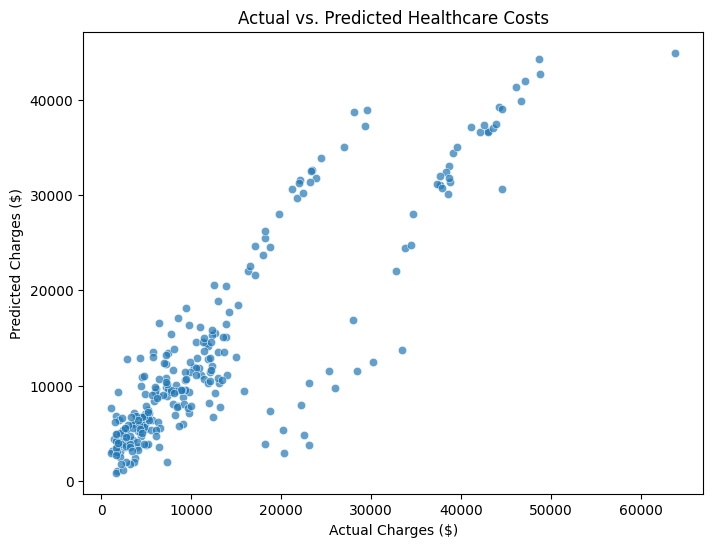

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.7)
plt.xlabel("Actual Charges ($)")
plt.ylabel("Predicted Charges ($)")
plt.title("Actual vs. Predicted Healthcare Costs")
plt.show()